1.importing libraries



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

# understanding the data

In [32]:
# Loading data
hprice_data = pd.read_csv(r"C:\Users\kk1255\Downloads\kishore\train.csv")


In [33]:
hprice_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
#check rows and columns of the data
hprice_data.shape

(1460, 81)

In [35]:
# Check for column details like name and datatypes
hprice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
hprice_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
# Checking the percentage of Null values in all the columns

def missing_value_coloumns():
    print('missing values % in each column: ')
    print(round(hprice_data.isnull().sum()/len(hprice_data.index)*100,2).sort_values(ascending=False)[round(hprice_data.isnull().sum()/len(hprice_data.index),2) > 0 ] )

missing_value_coloumns()

missing values % in each column: 
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [38]:
##so many columns are having missing values out of them majority missing columns are 5

# EDA analysis

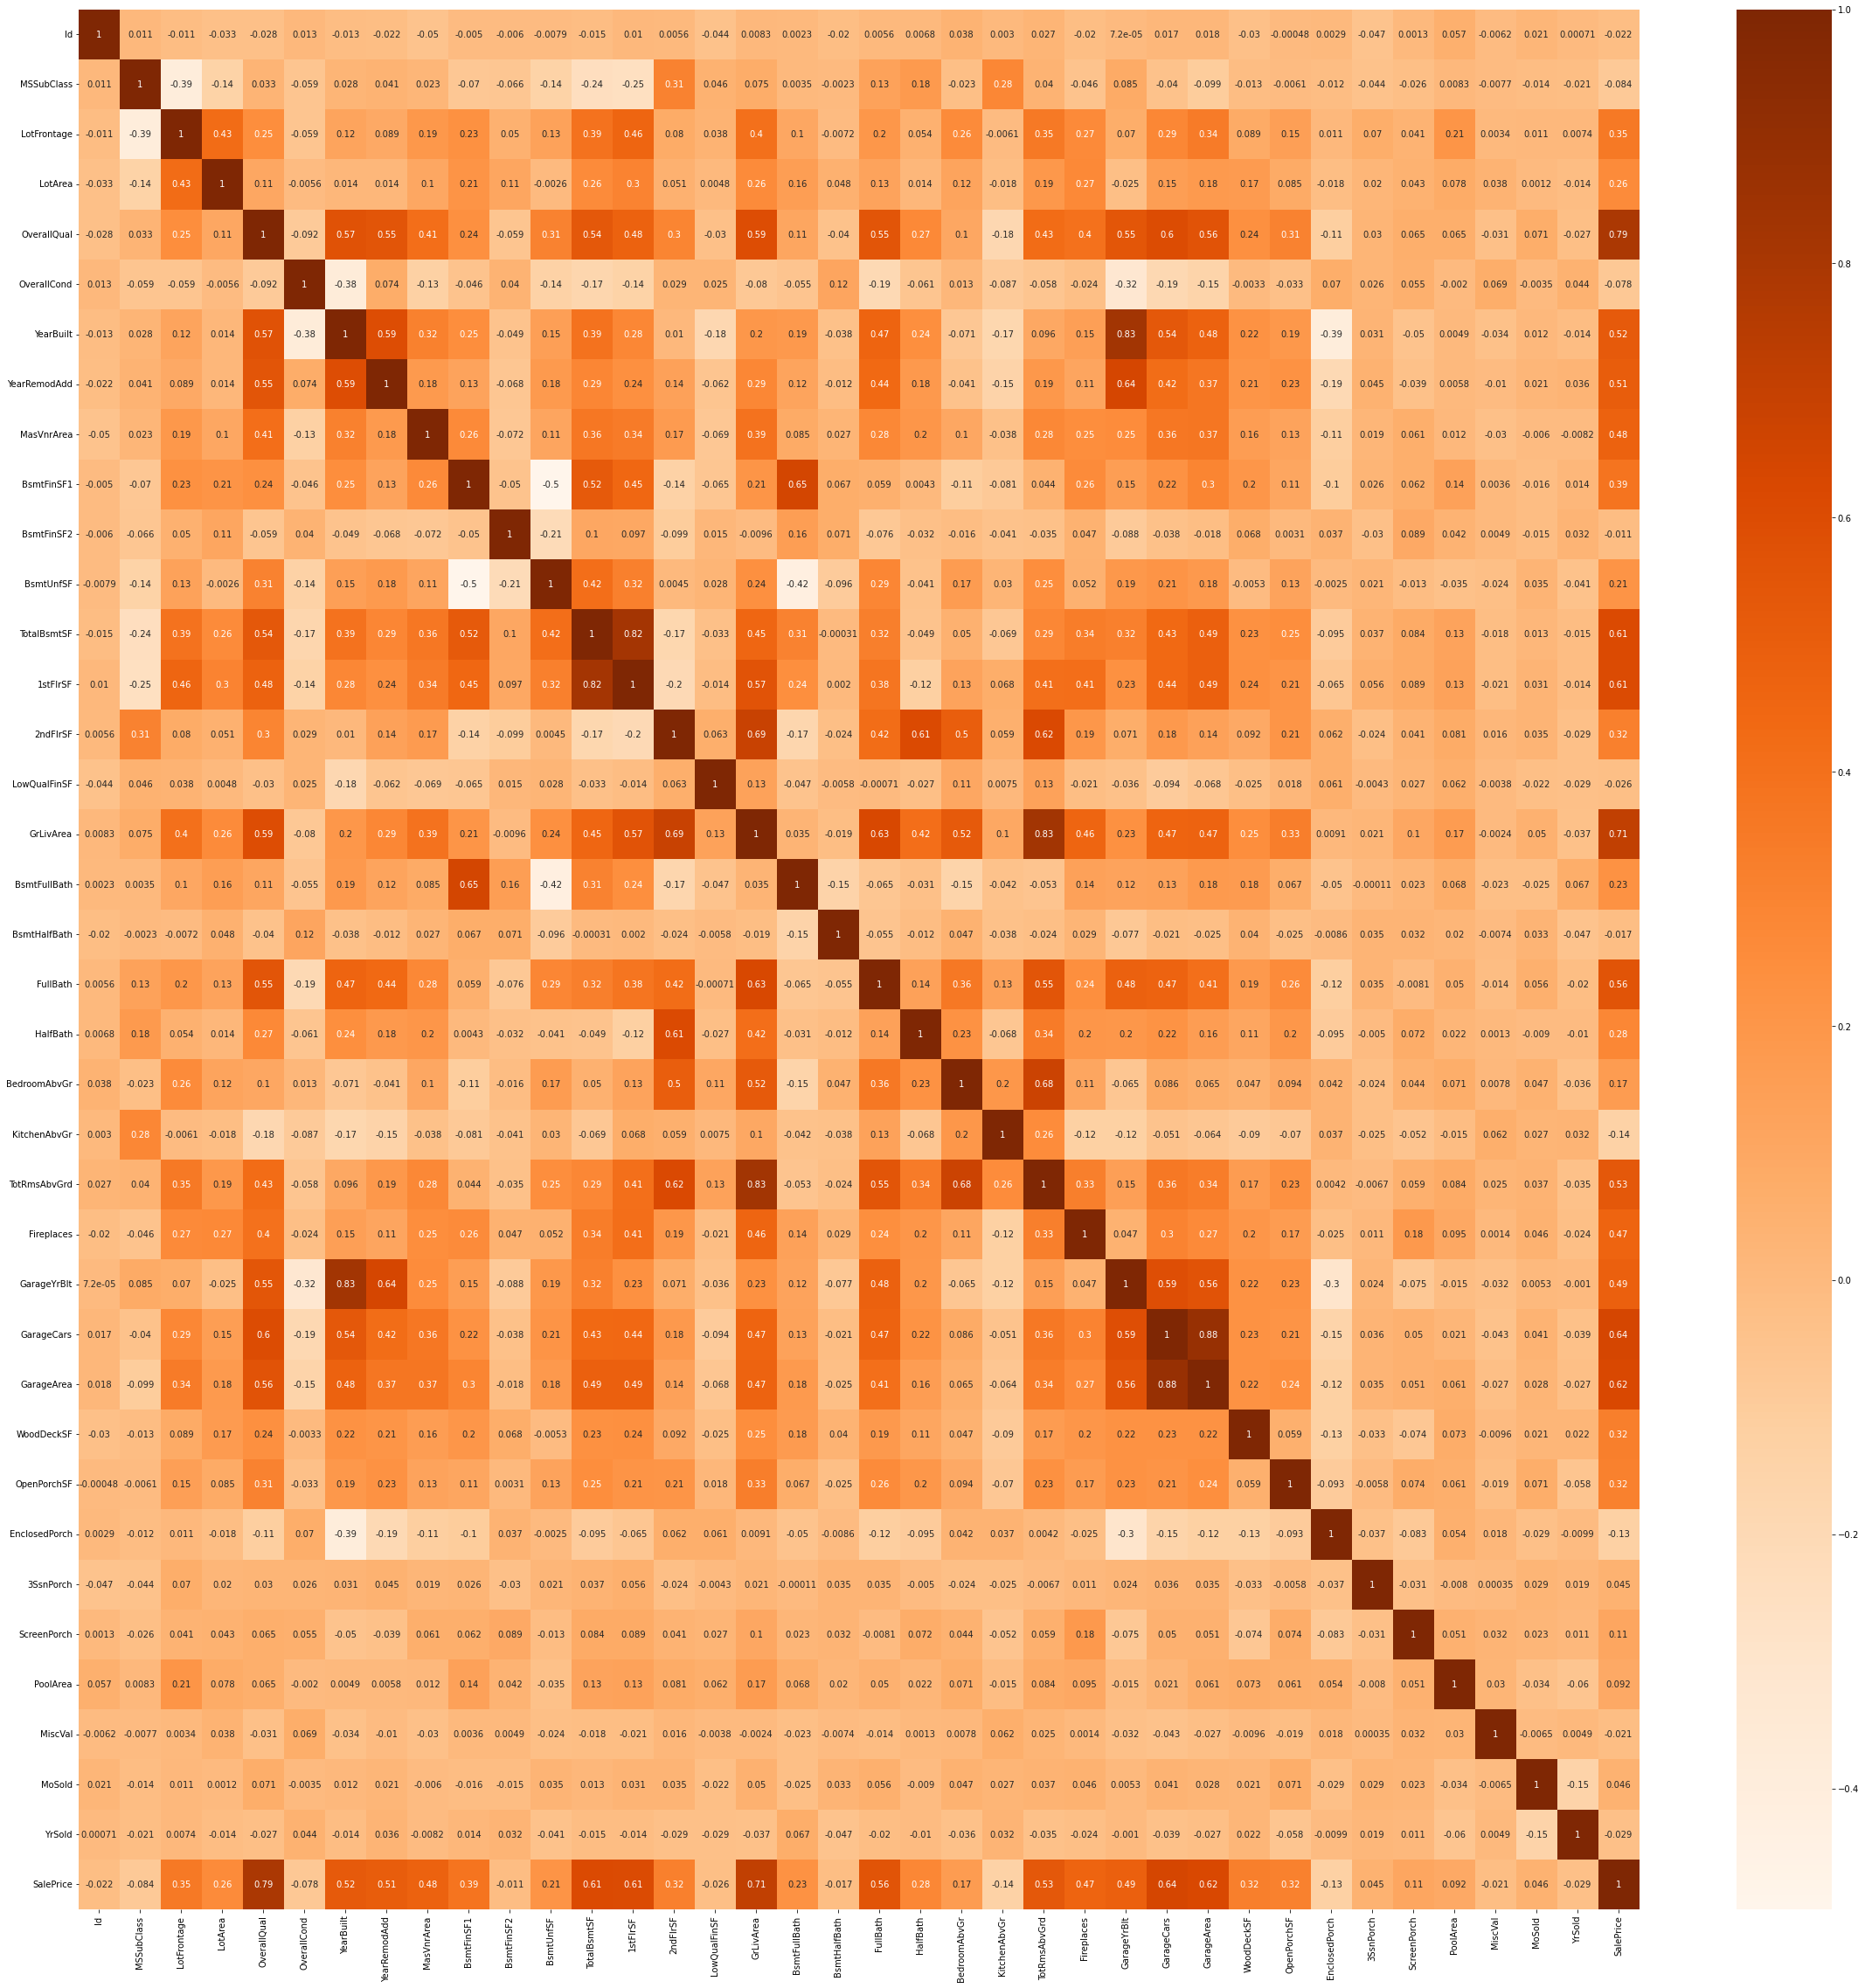

In [39]:
plt.figure(figsize = (40,40))
sns.heatmap(hprice_data.corr(), annot = True,cmap="Oranges")
plt.show()

# observations based on the heatmap:
1.OverallQual and SalePrice are highly correlated.
2.YearBuilt & YearRemoddAdd are highly correlated with GarageYrBuilt.
3.EnclosedPorch and YearBuilt are inversely proportional.
4.GrLivArea and TotRmsAbvGrd have proportional relation.
5.TotalBsmtSF and 1stFlrSF are highly correlated.

<Figure size 720x504 with 0 Axes>

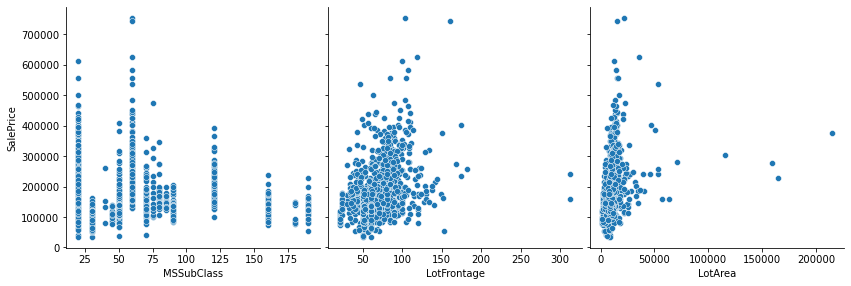

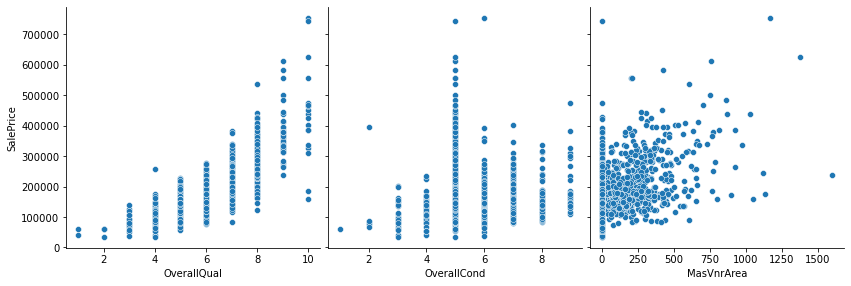

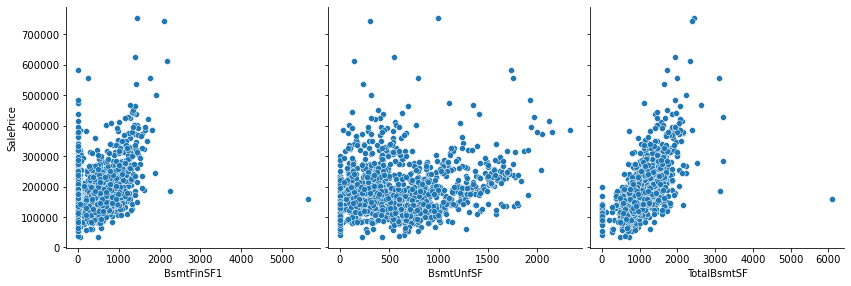

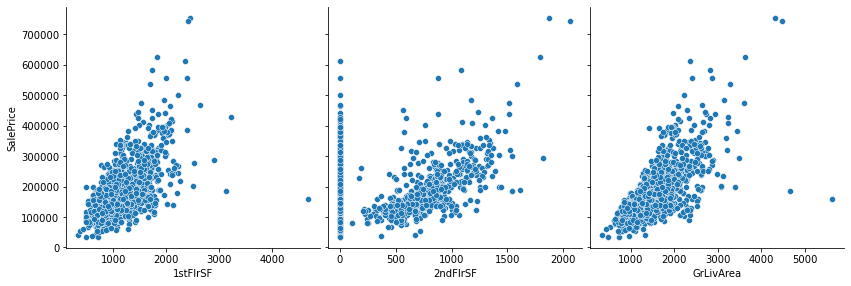

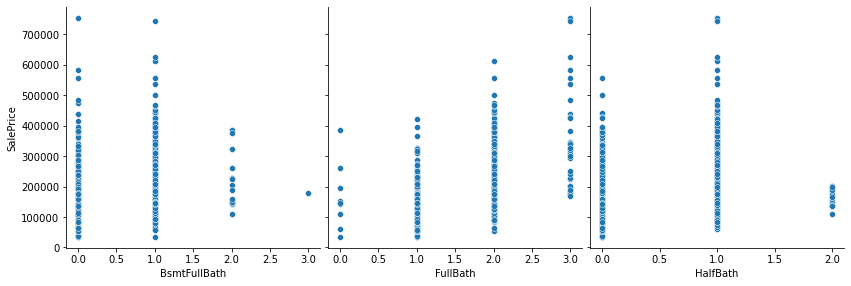

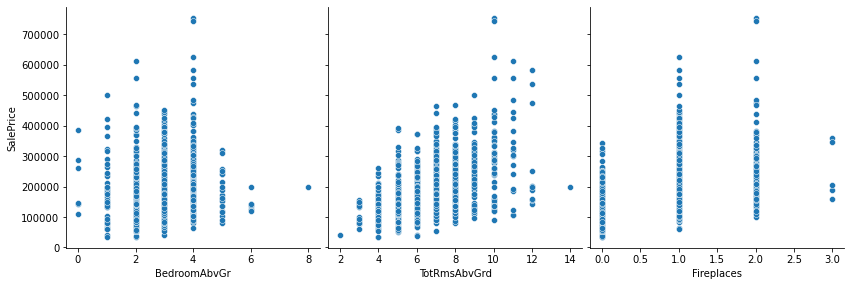

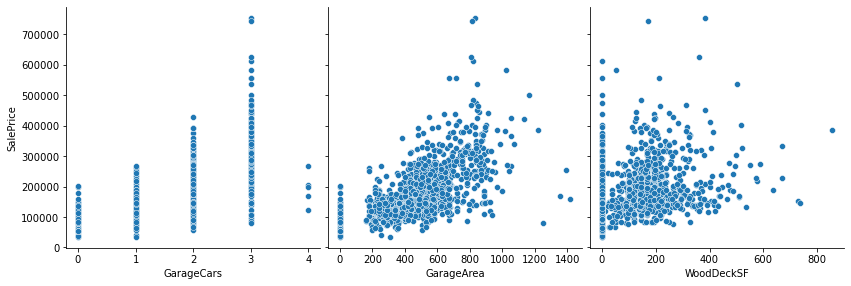

In [40]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,7))
sns.pairplot(hprice_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(hprice_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(hprice_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(hprice_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(hprice_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(hprice_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(hprice_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

 GarageArea,1stFlrSF,TotalBsmtS and GrLivArea are having good correlation with SalePrice

# Remove the columns that has more missing values

In [41]:
hprice_data = hprice_data.loc[:,(100*hprice_data.isnull().sum()/hprice_data.shape[0]).sort_values(ascending = False) < 40]
hprice_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# re-validate the coloumns again

In [42]:


def missing_value_coloumns():
    print('missing values % in each column: ')
    print(round(hprice_data.isnull().sum()/len(hprice_data.index)*100,2).sort_values(ascending=False)[round(hprice_data.isnull().sum()/len(hprice_data.index),2) > 0 ] )

missing_value_coloumns()

missing values % in each column: 
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [43]:
#replace 'nan' with 'na' 
def HandleMissingValues(columnNames):
    for i in columnNames:
        hprice_data[i] = hprice_data[i].fillna('NA')

HandleMissingValues(["GarageCond","GarageType","GarageFinish","GarageQual","BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual","MasVnrType"])

#Imputing missing values of Electrical with MODE asSBrkr has occured 1334 times
hprice_data.Electrical = hprice_data.Electrical.fillna(hprice_data.Electrical.mode()[0]) 

In [44]:
missing_value_coloumns()

missing values % in each column: 
LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
dtype: float64


# In LotFrontage will fill up the missing values with median

In [45]:
hprice_data.LotFrontage = hprice_data.LotFrontage.fillna(hprice_data.LotFrontage.median())
hprice_data.MasVnrArea = hprice_data.MasVnrArea.fillna(hprice_data.MasVnrArea.median())    
hprice_data.GarageYrBlt = hprice_data.GarageYrBlt.fillna(0) 

In [46]:
missing_value_coloumns()

missing values % in each column: 
Series([], dtype: float64)


In [47]:
hprice_data = hprice_data.astype({'MSSubClass':object})

##  Converting column values to their respective code from 0,1,2,3,4,5... format for easy readeability

def AssigningValues(data):
    ousePrice_data = hprice_data.replace(data)

AssigningValues({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
AssigningValues({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
AssigningValues({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
AssigningValues({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
AssigningValues({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
AssigningValues({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
AssigningValues({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [49]:
##Derive the age of the house i.e. TotalHouseAge from YrSold - YearBuilt 
hprice_data['TotalHouseAge'] = hprice_data.YrSold - hprice_data.YearBuilt

#Droping the YrSold and YearBuilt as we have that same info in TotalHouseAge column
hprice_data=hprice_data.drop(columns=['YrSold', 'YearBuilt'])

In [50]:
#check for the high bias columns
#Fetching all the object type columns along with their values and the weightage
for col in hprice_data.columns:
    if hprice_data[col].dtype == np.object :
        print('Columnn : ',col)
        print(hprice_data[col].value_counts(normalize=True))

Columnn :  MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
Columnn :  MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Columnn :  Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Columnn :  LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
Columnn :  LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Columnn :  Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Columnn :  LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: flo

In [51]:
#Dropping the biased columns, conditions atleast 80%
hprice_data=hprice_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [52]:
#fetch object type columns that are categorical
cat_columns = []
for col in hprice_data.columns:
    if hprice_data[col].dtype == np.object:
        cat_columns.append(col)
print('Categorical Columns List :\n',cat_columns)

Categorical Columns List :
 ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish']


# Create dumy variables for this object type columns

In [58]:
def Create_Dummy_Variables(col,df):
        col_df = pd.get_dummies(df[col],drop_first=True, prefix=col)
        col_df.head()
        return col_df
        
for col in cat_columns:
    hprice_data = pd.concat([hprice_data,Create_Dummy_Variables(col,hprice_data)],axis=1)

In [59]:
hprice_data.shape

(1460, 186)

In [60]:
#since we created the dummy columns remove those obj-type variables
hprice_data=hprice_data.drop(columns=cat_columns)

In [61]:
#re-verify
hprice_data.shape

(1460, 167)

# Model Creation

In [62]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(hprice_data,train_size=0.70,random_state=50)
print(train_data.shape)
print(test_data.shape)

(1021, 167)
(439, 167)


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#list of numeric columns excluding the dummy variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',  'TotRmsAbvGrd', 'Fireplaces'
           , 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'TotalHouseAge']

#fit_transform on train data
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])
train_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1408,-0.425441,-0.260972,-1.501313,1.254465,-1.679511,-0.576477,-0.943682,-0.283127,0.125599,-0.973611,...,1,0,0,0,0,1,0,0,0,1
1148,-0.027378,-0.439708,0.660663,1.254465,-1.679511,-0.576477,-0.943682,-0.283127,0.011664,-1.087319,...,1,0,0,0,0,1,0,0,0,1
861,0.237997,0.079416,-0.780655,-1.406495,-0.957538,-0.576477,0.869867,-0.283127,-0.840571,-0.025287,...,1,1,0,0,0,0,0,0,0,1
220,0.149539,-0.151452,0.660663,-0.519508,1.015852,-0.576477,-0.943682,-0.283127,2.121742,1.018550,...,0,1,0,0,0,0,0,0,1,0
1362,-0.027378,0.157219,-1.501313,-1.406495,1.063984,-0.576477,-0.943682,-0.283127,0.337518,-0.762114,...,1,1,0,0,0,0,0,0,0,1


In [65]:
## create an lr model
y_train = train_data.pop('SalePrice')
X_train = train_data

# Use rfe for feature selection

In [67]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 29),
 ('LotArea', False, 10),
 ('OverallQual', True, 1),
 ('OverallCond', False, 7),
 ('YearRemodAdd', False, 60),
 ('MasVnrArea', False, 44),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 13),
 ('BsmtHalfBath', False, 77),
 ('FullBath', False, 11),
 ('HalfBath', False, 53),
 ('BedroomAbvGr', False, 23),
 ('KitchenAbvGr', False, 12),
 ('TotRmsAbvGrd', False, 28),
 ('Fireplaces', False, 56),
 ('GarageYrBlt', False, 18),
 ('GarageCars', True, 1),
 ('GarageArea', False, 50),
 ('WoodDeckSF', False, 66),
 ('OpenPorchSF', False, 76),
 ('EnclosedPorch', False, 81),
 ('3SsnPorch', False, 61),
 ('ScreenPorch', False, 47),
 ('PoolArea', False, 57),
 ('MiscVal', False, 80),
 ('MoSold', False, 73),
 ('TotalHouseAge', False, 24),
 ('MSSubClass_30', False, 32),
 ('MSSubClass_40', False, 5),
 ('M

In [72]:
#Final selected/supported columns from RFE
final_col = X_train.columns[rfe.support_]
print(final_col)

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars',
       'MSSubClass_45', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior

In [73]:
#Function to build a model using statsmodel api

def create_model(df):
    X_train_sm = sm.add_constant(df)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm,X_train_sm

#Function to calculate VIFs and print them
def fetch_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

# 1st model

In [74]:

X_train_rfe = X_train[final_col]
lr1,X_train_sm=create_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     88.61
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:39:37   Log-Likelihood:                -11903.
No. Observations:                1021   AIC:                         2.396e+04
Df Residuals:                     942   BIC:                         2.435e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.72e+05 

In [75]:
#Print the VIF values
fetch_vif(X_train_rfe)

               Features   VIF
82      GarageFinish_NA   inf
7          LowQualFinSF   inf
51   Exterior2nd_CBlock   inf
46   Exterior1st_CBlock   inf
1            BsmtFinSF1   inf
..                  ...   ...
43  Exterior1st_AsphShn  1.15
20        LotConfig_FR2  1.11
55    Exterior2nd_Other  1.09
63      Foundation_Wood  1.07
21        LotConfig_FR3  1.06

[83 rows x 2 columns]


# 2nd model

In [76]:
X_train_new = X_train_rfe.drop(["GarageFinish_NA"], axis = 1)

In [77]:
lr2,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     88.61
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:42:30   Log-Likelihood:                -11903.
No. Observations:                1021   AIC:                         2.396e+04
Df Residuals:                     942   BIC:                         2.435e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.72e+05 

               Features   VIF
46   Exterior1st_CBlock   inf
2            BsmtFinSF2   inf
3             BsmtUnfSF   inf
4           TotalBsmtSF   inf
5              1stFlrSF   inf
..                  ...   ...
43  Exterior1st_AsphShn  1.15
20        LotConfig_FR2  1.11
55    Exterior2nd_Other  1.09
63      Foundation_Wood  1.07
21        LotConfig_FR3  1.06

[82 rows x 2 columns]


In [78]:
X_train_new = X_train_new.drop(["Exterior1st_CBlock"], axis = 1)

In [79]:
lr3,X_train_sm=create_model(X_train_new)
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     88.61
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:43:02   Log-Likelihood:                -11903.
No. Observations:                1021   AIC:                         2.396e+04
Df Residuals:                     942   BIC:                         2.435e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.72e+05 

               Features   VIF
8             GrLivArea   inf
1            BsmtFinSF1   inf
2            BsmtFinSF2   inf
3             BsmtUnfSF   inf
4           TotalBsmtSF   inf
..                  ...   ...
43  Exterior1st_AsphShn  1.15
20        LotConfig_FR2  1.11
54    Exterior2nd_Other  1.09
62      Foundation_Wood  1.07
21        LotConfig_FR3  1.06

[81 rows x 2 columns]


In [80]:
X_train_new = X_train_new.drop(["Exterior1st_AsphShn"], axis = 1)

In [81]:
lr4,X_train_sm=create_model(X_train_new)
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     89.79
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:44:02   Log-Likelihood:                -11904.
No. Observations:                1021   AIC:                         2.396e+04
Df Residuals:                     943   BIC:                         2.435e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.721e+05 

             Features   VIF
8           GrLivArea   inf
1          BsmtFinSF1   inf
2          BsmtFinSF2   inf
3           BsmtUnfSF   inf
4         TotalBsmtSF   inf
..                ...   ...
71       HeatingQC_Po  1.15
20      LotConfig_FR2  1.11
53  Exterior2nd_Other  1.09
61    Foundation_Wood  1.07
21      LotConfig_FR3  1.06

[80 rows x 2 columns]


In [82]:
X_train_new = X_train_new.drop(["GrLivArea",'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'], axis = 1)

In [83]:
lr5,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     93.46
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:46:02   Log-Likelihood:                -11905.
No. Observations:                1021   AIC:                         2.396e+04
Df Residuals:                     946   BIC:                         2.433e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.744e+05 

             Features     VIF
64    BsmtFinType1_NA     inf
59        BsmtQual_NA     inf
11        MSZoning_RL  128.76
33    RoofStyle_Gable  101.69
70  GarageType_Attchd   53.93
..                ...     ...
13       LotShape_IR3    1.11
15      LotConfig_FR2    1.10
48  Exterior2nd_Other    1.09
16      LotConfig_FR3    1.06
56    Foundation_Wood    1.06

[75 rows x 2 columns]


In [84]:
X_train_new = X_train_new.drop(['BsmtFinType1_NA','BsmtQual_NA','MSZoning_RL','RoofStyle_Gable','GarageType_Attchd'], axis = 1)

In [85]:
lr6,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     93.09
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:48:05   Log-Likelihood:                -11934.
No. Observations:                1021   AIC:                         2.401e+04
Df Residuals:                     950   BIC:                         2.436e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.556e+05 

In [86]:
X_train_new = X_train_new.drop(['ExterQual_TA','KitchenQual_TA','ExterQual_Gd','KitchenQual_Gd','BsmtQual_TA'], axis = 1)

In [87]:
lr7,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     88.91
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:51:24   Log-Likelihood:                -11989.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                     955   BIC:                         2.444e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.82e+05 

In [88]:
X_train_new = X_train_new.drop(['MSSubClass_45','HouseStyle_1.5Unf','2ndFlrSF','HouseStyle_1Story','HouseStyle_2Story'], axis = 1)

In [89]:
lr8,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     73.23
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          2.73e-314
Time:                        19:53:26   Log-Likelihood:                -12109.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                     960   BIC:                         2.464e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.84e+05 

In [90]:
X_train_new = X_train_new.drop(['LowQualFinSF','MSSubClass_180','MSSubClass_190','MSZoning_RH','LotShape_IR3','LotConfig_FR2','LotConfig_FR3','Neighborhood_NPkVill','Neighborhood_OldTown','Neighborhood_SWISU','HouseStyle_2.5Fin','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Shed','Exterior2nd_Brk Cmn','Exterior2nd_CBlock','Exterior2nd_Other','Exterior2nd_Stucco','MasVnrType_Stone','ExterQual_Fa','Foundation_Wood','BsmtQual_Fa','BsmtExposure_No','BsmtFinType1_LwQ','HeatingQC_Po','KitchenQual_Fa','GarageType_Basment','GarageType_Detchd'], axis = 1)

In [91]:
lr9,X_train_sm=create_model(X_train_new)
#Print the VIF values
fetch_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     136.0
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:04:59   Log-Likelihood:                -12125.
No. Observations:                1021   AIC:                         2.432e+04
Df Residuals:                     988   BIC:                         2.448e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.789e+05 

# Residual analysis

In [92]:
y_train_pred = lr9.predict(X_train_sm)
y_train_pred

1408     98303.563552
1148    120941.500813
861     154337.880625
220     200540.478138
1362    100970.773264
            ...      
229     218271.306343
70      246357.080206
132     154461.212220
1313    381521.240376
109     184351.894062
Length: 1021, dtype: float64

Text(0.5, 0, 'Errors')

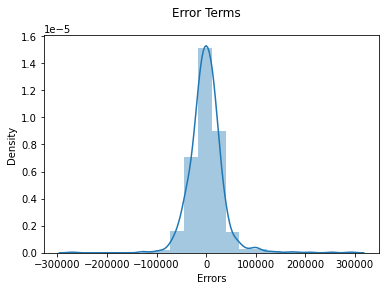

In [93]:
res = y_train-y_train_pred
# Plot the error terms histogram
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')

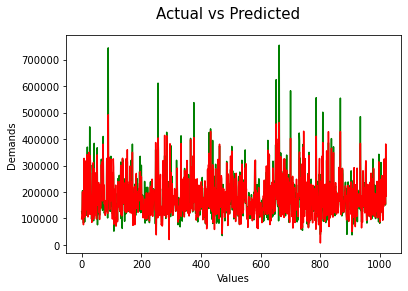

In [96]:
# Actual vs Predicted Values
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Values')
plt.ylabel('Demands')
plt.show()

# above is almost same

In [97]:
# use scalar
test_data[num_vars] = scaler.transform(test_data[num_vars])
test_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
930,0.149539,-0.157147,1.381321,-0.519508,1.063984,-0.576477,-0.909179,-0.283127,2.012364,0.945777,...,0,1,0,0,0,0,0,0,0,0
530,0.680289,-0.045437,-0.059996,-0.519508,0.197617,0.661455,0.744795,-0.283127,0.253206,0.934407,...,0,1,0,0,0,0,0,0,1,0
1291,-2.150379,-0.791924,-0.780655,1.254465,-0.620618,0.938435,-0.445549,-0.283127,-0.382552,-0.955417,...,1,0,0,0,0,1,0,0,0,1
1385,-1.310024,-0.462839,-1.501313,2.141452,1.063984,-0.576477,0.641287,-0.283127,-1.152753,-0.577907,...,0,0,0,0,0,1,0,0,0,1
305,0.459143,-0.029140,1.381321,-0.519508,0.967721,0.814076,2.213317,-0.283127,-0.070370,2.160177,...,0,1,0,0,0,0,0,0,0,0


In [98]:
y_test = test_data.pop('SalePrice')
X_test = test_data

In [99]:
y_test

930     201000
530     175000
1291    119500
1385    125500
305     305900
         ...  
1078    155900
1244    230000
406     115000
1459    147500
175     243000
Name: SalePrice, Length: 439, dtype: int64

In [100]:
X_train_new.columns

Index(['OverallQual', '1stFlrSF', 'GarageCars', 'MSSubClass_160',
       'MSZoning_FV', 'MSZoning_RM', 'LotConfig_CulDSac',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'RoofStyle_Mansard', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Plywood',
       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Foundation_Slab', 'BsmtQual_Gd',
       'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'GarageType_BuiltIn',
       'GarageType_NA'],
      dtype='object')

In [101]:
X_test_final = X_test[X_train_new.columns]
X_test_final = sm.add_constant(X_test_final)
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 930 to 175
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 439 non-null    float64
 1   OverallQual           439 non-null    float64
 2   1stFlrSF              439 non-null    float64
 3   GarageCars            439 non-null    float64
 4   MSSubClass_160        439 non-null    uint8  
 5   MSZoning_FV           439 non-null    uint8  
 6   MSZoning_RM           439 non-null    uint8  
 7   LotConfig_CulDSac     439 non-null    uint8  
 8   Neighborhood_Crawfor  439 non-null    uint8  
 9   Neighborhood_Edwards  439 non-null    uint8  
 10  Neighborhood_Mitchel  439 non-null    uint8  
 11  Neighborhood_NAmes    439 non-null    uint8  
 12  Neighborhood_NWAmes   439 non-null    uint8  
 13  Neighborhood_NoRidge  439 non-null    uint8  
 14  Neighborhood_NridgHt  439 non-null    uint8  
 15  Neighborhood_Sawyer  

In [102]:
#Running the Linear Model
#Predict the values for test data
y_test_pred = lr9.predict(X_test_final)

In [105]:
X_test_final.head()

,const,OverallQual,1stFlrSF,GarageCars,MSSubClass_160,MSZoning_FV,MSZoning_RM,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_Edwards,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Foundation_Slab,BsmtQual_Gd,BsmtExposure_Gd,BsmtFinType1_Unf,GarageType_BuiltIn,GarageType_NA
930,1.0,1.381321,0.795747,1.628624,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
530,1.0,-0.059996,0.906455,0.305772,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1291,1.0,-0.780655,-1.356622,-1.017080,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1385,1.0,-1.501313,-0.929238,-1.017080,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
305,1.0,1.381321,2.170586,1.628624,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


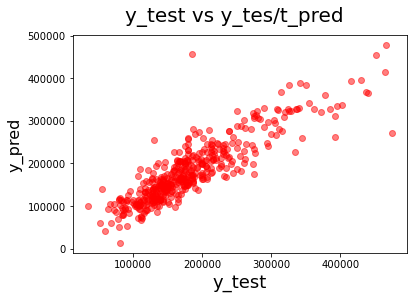

In [107]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5,color="red")
fig.suptitle('y_test vs y_tes/t_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [108]:
r2=r2_score(y_test,y_test_pred)
r2

0.7705106123735129

In [109]:
# n is number of rows in X
n = X_test_final.shape[0]

# Number of features
p = X_test_final.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7518114770854288

In [111]:
#ridge regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0,6.0,7.0,8.0,9.0, 10.0, 20, 50,60,70,80,90, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation process
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 60, 70, 80, 90,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
print(model_cv.best_params_)

{'alpha': 9.0}


In [113]:
#Creating the results dataframe.
cv_results = pd.DataFrame(model_cv.cv_results_)
#reading the results
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002200,0.000400,0.001605,0.000494,0.0001,{'alpha': 0.0001},-24186.425024,-23119.753727,-22690.480734,-28002.455410,...,-24373.701058,1890.125619,21,-22921.964608,-23396.957978,-23534.718652,-21577.569699,-23738.955535,-23034.033294,776.293902
1,0.001599,0.000490,0.001200,0.000400,0.001,{'alpha': 0.001},-24186.391053,-23119.241792,-22690.071840,-28002.313274,...,-24373.153463,1890.300118,20,-22921.953099,-23396.950037,-23534.702580,-21577.473540,-23738.927384,-23034.001328,776.322389
2,0.002000,0.000632,0.001202,0.000401,0.01,{'alpha': 0.01},-24186.041700,-23114.162468,-22686.008975,-28000.899743,...,-24367.706641,1892.042593,19,-22921.826974,-23396.861113,-23534.534160,-21576.513119,-23738.640020,-23033.675077,776.604205
3,0.001988,0.000012,0.001016,0.000022,0.05,{'alpha': 0.05},-24184.291451,-23092.415928,-22669.042577,-27994.780023,...,-24344.224012,1899.635604,18,-22921.037802,-23396.269201,-23533.630538,-21572.316229,-23737.240727,-23032.098899,777.776189
4,0.001919,0.000519,0.001807,0.000404,0.1,{'alpha': 0.1},-24181.933718,-23067.049916,-22651.799540,-27987.464756,...,-24316.820299,1908.488666,17,-22919.584052,-23395.128666,-23532.464272,-21567.423077,-23735.692846,-23030.058583,779.116756


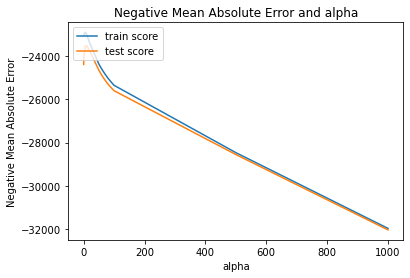

In [114]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [116]:
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)

# Method to get the coefficient values

ridge_coeff_dict = dict(pd.Series(ridge.coef_, index = X_train_new.columns))
ridge_coeff_dict

{'OverallQual': 34027.87491648577,
 '1stFlrSF': 16858.23280527155,
 'GarageCars': 16202.506654263729,
 'MSSubClass_160': -14027.438080069098,
 'MSZoning_FV': 12792.731617339166,
 'MSZoning_RM': -20804.55729435751,
 'LotConfig_CulDSac': 18395.32216322096,
 'Neighborhood_Crawfor': 20722.354124886977,
 'Neighborhood_Edwards': -16366.320497412153,
 'Neighborhood_Mitchel': -21373.590493559997,
 'Neighborhood_NAmes': -18088.1451690103,
 'Neighborhood_NWAmes': -12265.302628205334,
 'Neighborhood_NoRidge': 53811.27742670077,
 'Neighborhood_NridgHt': 28646.315332687882,
 'Neighborhood_Sawyer': -12936.086497140692,
 'Neighborhood_StoneBr': 21297.897654886256,
 'RoofStyle_Mansard': 7591.780781928544,
 'Exterior1st_BrkComm': -5350.685441059089,
 'Exterior1st_BrkFace': 14472.905739098773,
 'Exterior1st_CemntBd': 22606.78032849823,
 'Exterior1st_ImStucc': -6979.039166808433,
 'Exterior1st_Plywood': 1752.569783366725,
 'Exterior2nd_HdBoard': 4615.505579603989,
 'Exterior2nd_ImStucc': 18045.3294821367

In [117]:
#drop the const
X_test_final = X_test_final.drop(['const'], axis=1)

In [118]:
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_final)

In [120]:
#score for trained data
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

0.8074366889976975


In [121]:
# score for tested data
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.79037611345394


# Lasso regression

In [122]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 60, 70, 80, 90,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
print(model_cv.best_params_)

{'alpha': 100}


In [124]:
#Creating the results dataframe.
cv_results = pd.DataFrame(model_cv.cv_results_)
#reading the results
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002999,1.549358e-03,0.001200,0.000400,0.0001,{'alpha': 0.0001},-24186.428859,-23119.809771,-22690.525311,-28002.471001,...,-24373.761310,1890.106485,27,-22921.965637,-23396.958695,-23534.720268,-21577.580096,-23738.958453,-23034.036630,776.290777
1,0.003400,4.905056e-04,0.001406,0.000486,0.001,{'alpha': 0.001},-24186.429522,-23119.801822,-22690.517340,-28002.469098,...,-24373.755680,1890.108802,26,-22921.963513,-23396.957291,-23534.718826,-21577.577491,-23738.956605,-23034.034745,776.291162
2,0.002399,4.903888e-04,0.001202,0.000401,0.01,{'alpha': 0.01},-24186.436243,-23119.722347,-22690.437614,-28002.450045,...,-24373.699453,1890.131945,25,-22921.942300,-23396.943245,-23534.704423,-21577.551416,-23738.938280,-23034.015933,776.295060
3,0.002000,4.862804e-07,0.001002,0.000004,0.05,{'alpha': 0.05},-24186.466412,-23119.369265,-22690.083256,-28002.365348,...,-24373.449676,1890.234777,24,-22921.848147,-23396.880917,-23534.640489,-21577.435578,-23738.856961,-23033.932418,776.312402
4,0.002597,4.938993e-04,0.001204,0.000394,0.1,{'alpha': 0.1},-24186.509607,-23118.929867,-22689.642728,-28002.259396,...,-24373.139432,1890.362502,23,-22921.733828,-23396.808271,-23534.564907,-21577.290609,-23738.755379,-23033.830599,776.335109


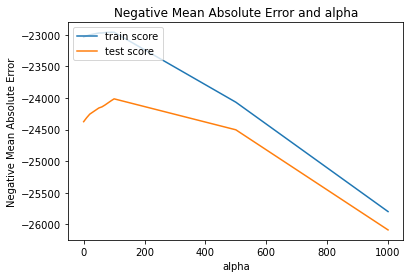

In [125]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [126]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=100)

In [127]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train_new.columns))
lasso_coeff_dict

{'OverallQual': 32775.81694989505,
 '1stFlrSF': 16437.035052929394,
 'GarageCars': 15930.310041864734,
 'MSSubClass_160': -15258.957186963195,
 'MSZoning_FV': 15972.820123647263,
 'MSZoning_RM': -21226.757106383633,
 'LotConfig_CulDSac': 18532.578479624295,
 'Neighborhood_Crawfor': 24150.284453820987,
 'Neighborhood_Edwards': -17244.17864085186,
 'Neighborhood_Mitchel': -23404.527630247976,
 'Neighborhood_NAmes': -18017.83651713426,
 'Neighborhood_NWAmes': -9812.910495881059,
 'Neighborhood_NoRidge': 70671.80618517699,
 'Neighborhood_NridgHt': 34489.2557169669,
 'Neighborhood_Sawyer': -12827.998408840685,
 'Neighborhood_StoneBr': 28283.279704836426,
 'RoofStyle_Mansard': 1936.5915759302327,
 'Exterior1st_BrkComm': -0.0,
 'Exterior1st_BrkFace': 15832.424589150292,
 'Exterior1st_CemntBd': 24787.949420583584,
 'Exterior1st_ImStucc': -0.0,
 'Exterior1st_Plywood': 974.3794629196695,
 'Exterior2nd_HdBoard': 3782.156919641046,
 'Exterior2nd_ImStucc': 24468.30648746192,
 'Exterior2nd_MetalSd':

In [128]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_final)

In [129]:
# score for trained data
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

0.8101885606101265


In [130]:
# score for tested data
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7883751823806108


# Comparision between Linear, Ridge and lasso Regression
#### Linear Regression

- Train dataset R^2 : 0.77
- Test dataset R^2 : 0.75

#### Ridge Regression

- Train dataset R^2 : 0.80
- Test dataset R^2 : 0.79

#### Lasso Regression

- Train dataset R^2 : 0.81
- Test dataset R^2 : 0.78

- Based on the requirement, the corporation should concentrate more on the negative aspects and focus on buying homes below market value.
- Additionally, by enhancing the aforementioned factors and emphasising the highly appreciated positive factors when selling, they can increase revenues.
- The SalePrice is heavily influenced by the square feet of above-grade (ground) living space.

- Basement and external quality that is good and great is better sold
- Because there is less demand for housing in Northridge, Northridge Heights, and Stone Brook, it sells there more slowly and for less money.
- The ideal value of lambda in the RIDGE regression is 9.
- 100 is the Optimum value for lambda in LASSO regression